# Cheesy/Greedy Algorithm on Rizal
This application simulates the use of cheesy algorithm in the province of Rizal to determine the optimal path to go to every municipality without traversing on any path twice.<hr>

Created by: Group 2 | Discrete Structures

## Rizal Map
The following code creates a map with nodes and edges. For familiarity, we assume it's the Rizal Map

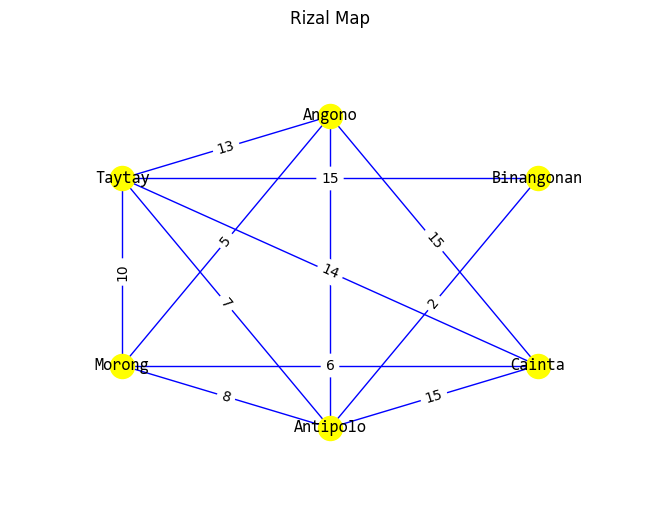

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

rizalNodes = ['Angono', 'Binangonan', 'Cainta', 'Antipolo', 'Morong', 'Taytay']
rizalEdges = [
    # ('Angono', 'Binangonan', 8), 
    ('Angono', 'Taytay', 13),
    ('Angono', 'Morong', 5),
    ('Angono', 'Cainta', 15),
    ('Antipolo', 'Cainta',  15), 
    ('Antipolo', 'Angono', 4), 
    ('Antipolo', 'Taytay', 7),
    ('Antipolo', 'Binangonan', 2),
    ('Antipolo', 'Morong', 8),
    ('Taytay', 'Cainta', 14), 
    ('Taytay', 'Binangonan', 15), 
    # ('Binangonan', 'Morong', 11),
    # ('Binangonan', 'Cainta', 16), 
    ('Morong', 'Taytay', 10),
    ('Morong', 'Cainta', 6)]
pos = {
    'Angono': (4, 6),
    'Cainta': (6, 2),
    'Taytay': (2, 5),
    'Binangonan': (6, 5),
    'Morong': (2, 2),
    # 'Teresa': (5, 3.5),
    'Antipolo': (4, 1)
}
df = pd.read_csv(r"C:\Users\magan\Desktop\Rizal.csv")
df.index = rizalNodes
Rizal = nx.Graph()
Rizal.add_nodes_from(rizalNodes)
Rizal.add_weighted_edges_from(rizalEdges)
nx.draw(Rizal, with_labels = True, node_color = 'yellow', pos = pos, edge_color = 'blue', font_family = 'Consolas')
labels = nx.get_edge_attributes(Rizal, "weight")
nx.draw_networkx_edge_labels(Rizal, pos, edge_labels=labels)
plt.margins(0.2)
plt.title("Rizal Map")
plt.show()

## Cheesy Algorithm Implementation
The following code implements the algorithm. And implements functions such as displaying the resulting graph with optimal path and highlighting the path.

In [5]:
def greedy_hamiltonian_circuit(graph, start_node= 0):
    visited = set()
    path = [start_node]
    current = start_node
    visited.add(current)
    
    while len(visited) < len(graph):
        
        # Find the closest unvisited neighbor
        neighbors = [
            (neighbor, graph.edges[current, neighbor]['weight'])
            for neighbor in graph.neighbors(current)
            if neighbor not in visited
        ]

        # Transfer to the closest node
        next_node = min(neighbors, key=lambda x: x[1])[0]
        if (not(next_node)):
            print("No Hamiltonian Circuit exists.")
            return
        else:
            path.append(next_node)
            visited.add(next_node)
            current = next_node

    # Return to the start node to complete the circuit
    path.append(start_node)
    return path

def highlight_path(graph, path):
    edge_colors = []
    for edge in graph.edges():
        if (edge in zip(path, path[1:])) or ((edge[1], edge[0]) in zip(path, path[1:])):
            edge_colors.append("black")
         
        else:
            edge_colors.append("lightgray")
     
    
    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color="yellow", edge_color=edge_colors)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(f"Hamiltonian Circuit: {' -> '.join(map(str, path))}")
    plt.margins(0.2)
    plt.show()
    
def simulate(graph, start_node = 0):
    if graph == Rizal:
        print('Table of Values:\n', df)
    try:
        path = greedy_hamiltonian_circuit(graph, start_node)
        highlight_path(graph, path)
    except:
        print("\n\nNo Hamiltonian Exists.")    

# Simulation
To simulate, call `simulate(x, y)`; where `x` is the map/graph and `y` is the location.<hr>

Table of Values:
             Angono  Binangonan  Cainta  Antipolo  Morong  Taytay
Angono         NaN         NaN    15.0       4.0     5.0    13.0
Binangonan     NaN         NaN     NaN       2.0     NaN    15.0
Cainta        15.0         NaN     NaN      15.0     6.0    14.0
Antipolo       4.0         2.0    15.0       NaN     8.0     7.0
Morong         5.0         NaN     6.0       8.0     NaN    10.0
Taytay        13.0        15.0    14.0       7.0    10.0     NaN


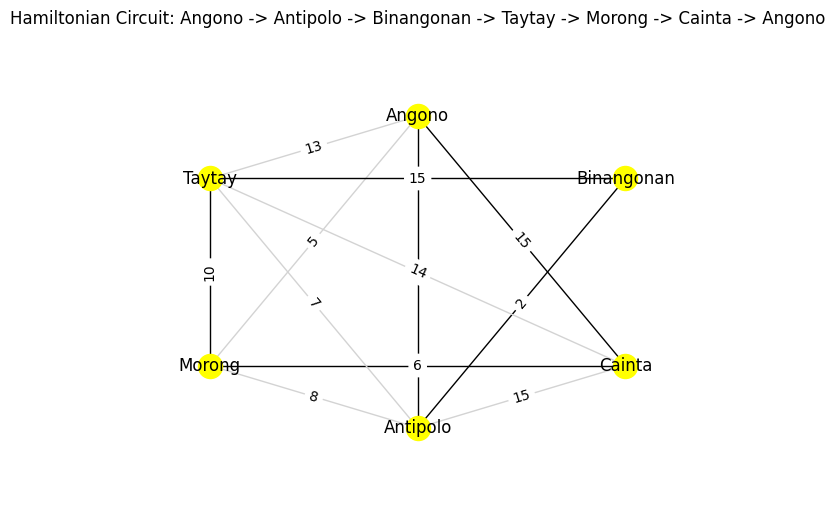

In [6]:
simulate(Rizal, 'Angono')

Table of Values:
             Angono  Binangonan  Cainta  Antipolo  Morong  Taytay
Angono         NaN         NaN    15.0       4.0     5.0    13.0
Binangonan     NaN         NaN     NaN       2.0     NaN    15.0
Cainta        15.0         NaN     NaN      15.0     6.0    14.0
Antipolo       4.0         2.0    15.0       NaN     8.0     7.0
Morong         5.0         NaN     6.0       8.0     NaN    10.0
Taytay        13.0        15.0    14.0       7.0    10.0     NaN


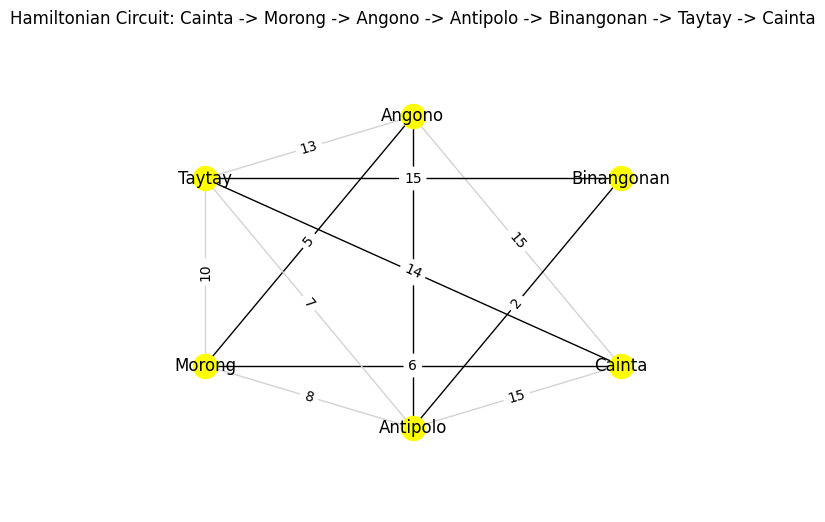

In [7]:
simulate(Rizal, 'Cainta')

In [9]:
simulate(Rizal, 'Taytay')

Table of Values:
             Angono  Binangonan  Cainta  Antipolo  Morong  Taytay
Angono         NaN         NaN    15.0       4.0     5.0    13.0
Binangonan     NaN         NaN     NaN       2.0     NaN    15.0
Cainta        15.0         NaN     NaN      15.0     6.0    14.0
Antipolo       4.0         2.0    15.0       NaN     8.0     7.0
Morong         5.0         NaN     6.0       8.0     NaN    10.0
Taytay        13.0        15.0    14.0       7.0    10.0     NaN


No Hamiltonian Exists.
